# Pandas Analysis of Netflix Shows and Movies

In [162]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# import os

# change the paths below

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "country.csv") 

## 3. Average duration of movies and show by categories 

In [163]:
# merging

category = df[["show_id", "type", "length"]]

category = df_category.merge(category, how = "inner")

category

,show_id,listed_in,type,length
0,s1,Documentaries,Movie,90.0
1,s10,Comedies,Movie,104.0
2,s10,Dramas,Movie,104.0
3,s100,TV Comedies,Show,1.0
4,s100,TV Dramas,Show,1.0
...,...,...,...,...
19318,s998,British TV Shows,Show,1.0
19319,s998,Docuseries,Show,1.0
19320,s998,International TV Shows,Show,1.0
19321,s999,Documentaries,Movie,58.0


In [164]:
# getting rid of "TV" and "movies" within rows

category["listed_in"] = category["listed_in"].str.replace("TV","")

category["listed_in"] = category["listed_in"].str.replace("Movies","")

category["listed_in"] = category["listed_in"].str.strip() # lstrip was needed

In [165]:
category.rename(columns={"listed_in": "Category"}, inplace=True)

In [166]:
# creating pivot table

pt_category = pd.pivot_table(
    category,
    values="length",
    index="Category",
    columns="type",
    aggfunc="mean"
)

In [167]:
# only categories that both columns have values

pt_category = pt_category.dropna()

pt_category.round(decimals=2)

type,Movie,Show
Category,,
Action & Adventure,113.52,2.40
Comedies,103.88,2.15
Dramas,113.05,1.85
Horror,98.45,2.11
Sci-Fi & Fantasy,106.02,2.65
Thrillers,107.17,2.05


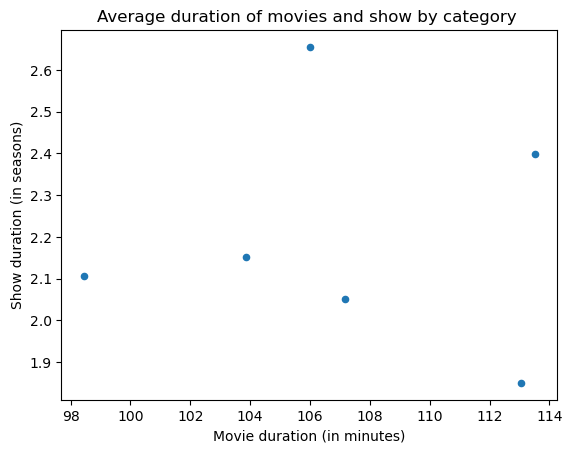

In [168]:
# chart



pt_category.plot(kind = "scatter", title = "Average duration of movies and show by category ", x="Movie", y="Show", xlabel = "Movie duration (in minutes)", ylabel="Show duration (in seasons)")



plt.show()

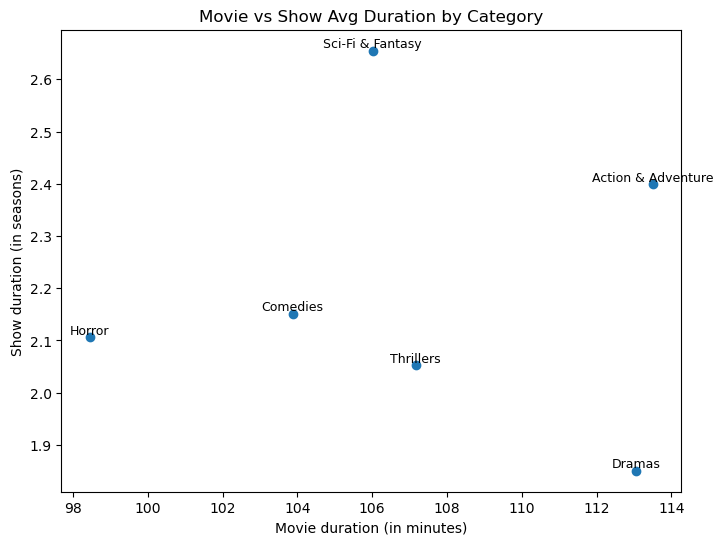

In [169]:
# chart

pt_category = pt_category.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(pt_category["Movie"], pt_category["Show"])

for _, row in pt_category.iterrows():
    plt.text(
        row["Movie"],
        row["Show"],
        row["Category"],
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.xlabel("Movie duration (in minutes)")
plt.ylabel("Show duration (in seasons)")
plt.title("Movie vs Show Avg Duration by Category")

plt.savefig(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "images" / "chart3.png", dpi=300, bbox_inches='tight')

plt.show()

In [170]:
# saving to a file

pt_category.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "avg_duration.csv", index = False) 